In [15]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

In [2]:
style.use('ggplot')

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

# using yahoo finance api
df = web.DataReader('TSLA', 'yahoo', start, end)

print(df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


In [3]:
# convert to csv file
df.to_csv('tesla.csv')

In [5]:
# reading in the csv file
df = pd.read_csv('tesla.csv', parse_dates=True, index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


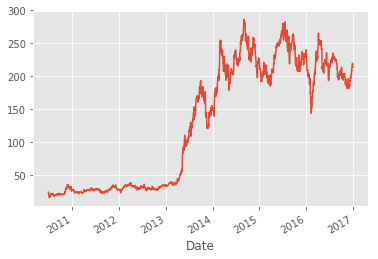

In [8]:
%matplotlib inline
df['Adj Close'].plot() # to plot a column
plt.show()

In [9]:
# data manipulation

# calculate 100 moving average
df['100ma'] = df['Adj Close'].rolling(window=100).mean()

print(df.head())

             High        Low       Open      Close    Volume  Adj Close  100ma
Date                                                                          
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999    NaN
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000    NaN
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999    NaN
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001    NaN
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001    NaN


In [10]:
# removing NaN rows
new_df = df.dropna()
print(new_df.head())

                 High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2010-11-17  30.750000  28.610001  30.200001  29.490000   750000  29.490000   
2010-11-18  30.740000  28.920000  30.670000  29.889999   956100  29.889999   
2010-11-19  31.370001  29.700001  30.160000  30.990000  1150500  30.990000   
2010-11-22  33.450001  31.500000  31.570000  33.400002  1529700  33.400002   
2010-11-23  35.680000  32.189999  33.290001  34.570000  1577800  34.570000   

              100ma  
Date                 
2010-11-17  20.9879  
2010-11-18  21.0479  
2010-11-19  21.1195  
2010-11-22  21.2339  
2010-11-23  21.3876  


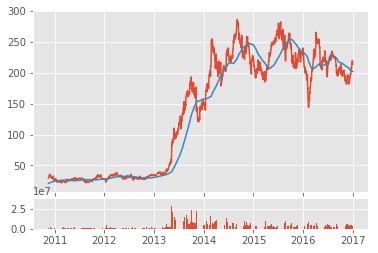

In [12]:
# plotting the data
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(new_df.index, new_df['Adj Close'])
ax1.plot(new_df.index, new_df['100ma'])

ax2.bar(new_df.index, new_df['Volume'])

plt.show()

In [13]:
# resampling data
# open, high, low, close
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


In [16]:
# using matplotlib candlestick_ohlc
# it requires dates to be in matplotlib.dates format
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


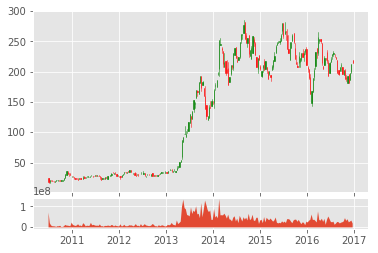

In [17]:
# plot the data
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()